# Project: Dog vs Cat Classification

In [54]:
from pathlib import Path
import os
import torch
from torch import nn

In [55]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [56]:
data_path = Path("data/")
train_path = data_path / "train"
test_path = data_path / "test"

train_path, test_path

(WindowsPath('data/train'), WindowsPath('data/test'))

In [57]:
from PIL import Image
import random
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Dog, Shape: (500, 333, 3)')

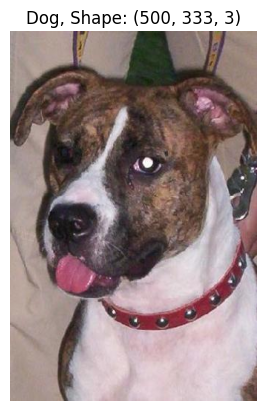

In [58]:
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
image_path_list = list(data_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)
img_is_array = np.asarray(img)

plt.imshow(img)
plt.axis(False)
plt.title(f"{image_class}, Shape: {img_is_array.shape}")

In [59]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [60]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [61]:
transformed_image = data_transform(img)
transformed_image

tensor([[[0.6353, 0.6314, 0.6353,  ..., 0.6588, 0.6431, 0.6353],
         [0.6392, 0.6314, 0.6235,  ..., 0.6667, 0.6549, 0.6392],
         [0.6235, 0.6078, 0.6039,  ..., 0.6745, 0.6549, 0.6235],
         ...,
         [0.4235, 0.3922, 0.4706,  ..., 0.6353, 0.6392, 0.6510],
         [0.3882, 0.3647, 0.4078,  ..., 0.6392, 0.6392, 0.6431],
         [0.3451, 0.4078, 0.4471,  ..., 0.6471, 0.6510, 0.6549]],

        [[0.5569, 0.5569, 0.5647,  ..., 0.5961, 0.5922, 0.5922],
         [0.5608, 0.5529, 0.5490,  ..., 0.5961, 0.5922, 0.5843],
         [0.5529, 0.5333, 0.5137,  ..., 0.5961, 0.5961, 0.5765],
         ...,
         [0.3098, 0.2980, 0.3608,  ..., 0.5686, 0.5725, 0.5843],
         [0.2745, 0.2745, 0.3137,  ..., 0.5725, 0.5725, 0.5765],
         [0.2431, 0.2980, 0.3529,  ..., 0.5765, 0.5804, 0.5843]],

        [[0.5098, 0.4980, 0.5059,  ..., 0.5725, 0.5725, 0.5804],
         [0.5255, 0.5098, 0.5059,  ..., 0.5765, 0.5804, 0.5765],
         [0.5059, 0.4941, 0.4863,  ..., 0.5804, 0.5804, 0.

Text(0.5, 1.0, 'Dog, Shape: torch.Size([3, 64, 64])')

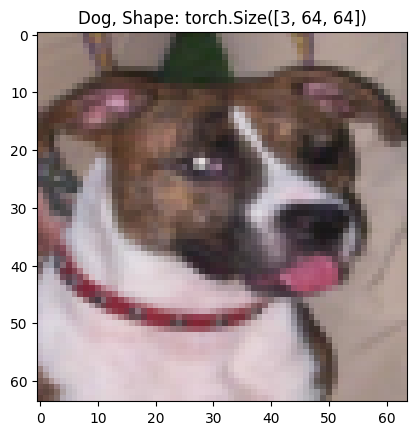

In [62]:
plt.imshow(transformed_image.permute(1, 2, 0))
plt.title(f"{image_class}, Shape: {transformed_image.shape}")

# Loading data using 'ImageFolder'

In [63]:
train_data = datasets.ImageFolder(root=train_path,
                                  transform=data_transform)

test_data = datasets.ImageFolder(root=test_path,
                                 transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 160
     Root location: data\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 42
     Root location: data\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [64]:
# Get class names as list
class_names = train_data.classes
class_names

['Cat', 'Dog']

In [65]:
# Get class names as dictionary 
class_dict = train_data.class_to_idx
class_dict

{'Cat': 0, 'Dog': 1}

In [66]:
len(train_data), len(test_data)

(160, 42)

# Turn loaded images into 'DataLoader'

In [68]:
BATCH_SIZE = 32
NUM_WORKERS = 0

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=NUM_WORKERS,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1d664144fa0>,
 <torch.utils.data.dataloader.DataLoader at 0x1d6680cca30>)

In [70]:
img_custom, label_custom = next(iter(train_dataloader))

img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))